# World University Rankings

### About Dataset

###### This dataset is taken from the site https://www.kaggle.com/ for educational purposes.

https://www.kaggle.com/datasets/mylesoneill/world-university-rankings

### Loading data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [7]:
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [8]:
df = pd.read_csv('cwurData.csv')

In [9]:
df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
5,6,Princeton University,USA,5,8,14,2,53,33,26,NaN,101,82.50,2012
6,7,University of Oxford,United Kingdom,2,13,28,9,15,13,19,NaN,26,82.34,2012
7,8,Yale University,USA,6,14,31,12,14,6,15,NaN,66,79.14,2012
8,9,Columbia University,USA,7,23,21,10,13,12,14,NaN,5,78.86,2012
9,10,"University of California, Berkeley",USA,8,16,52,6,6,5,3,NaN,16,78.55,2012


In [10]:
len(df)

2200

In [11]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [12]:
df.isna().mean().sort_values(ascending=False)

broad_impact            0.090909
world_rank              0.000000
institution             0.000000
country                 0.000000
national_rank           0.000000
quality_of_education    0.000000
alumni_employment       0.000000
quality_of_faculty      0.000000
publications            0.000000
influence               0.000000
citations               0.000000
patents                 0.000000
score                   0.000000
year                    0.000000
dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2200 non-null   int64  
 1   institution           2200 non-null   object 
 2   country               2200 non-null   object 
 3   national_rank         2200 non-null   int64  
 4   quality_of_education  2200 non-null   int64  
 5   alumni_employment     2200 non-null   int64  
 6   quality_of_faculty    2200 non-null   int64  
 7   publications          2200 non-null   int64  
 8   influence             2200 non-null   int64  
 9   citations             2200 non-null   int64  
 10  broad_impact          2000 non-null   float64
 11  patents               2200 non-null   int64  
 12  score                 2200 non-null   float64
 13  year                  2200 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 240.8+ KB


In [14]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [15]:
df.nunique()

world_rank              1000
institution             1024
country                   59
national_rank            229
quality_of_education     367
alumni_employment        565
quality_of_faculty       199
publications             987
influence                944
citations                135
broad_impact             343
patents                  738
score                    764
year                       4
dtype: int64

In [16]:
df['country'].value_counts(dropna=False)

country
USA                     573
China                   167
Japan                   159
United Kingdom          144
Germany                 115
France                  109
Italy                    96
Spain                    81
Canada                   72
South Korea              72
Australia                58
Taiwan                   46
Brazil                   36
India                    31
Netherlands              29
Switzerland              26
Sweden                   24
Austria                  24
Israel                   22
Finland                  20
Turkey                   20
Belgium                  20
Poland                   18
Iran                     16
Ireland                  16
Portugal                 14
Greece                   14
Hong Kong                12
Norway                   12
New Zealand              12
Hungary                  12
Denmark                  12
South Africa             10
Czech Republic           10
Russia                    9
Saudi Arabia

Text(0.5, 0, 'Count')

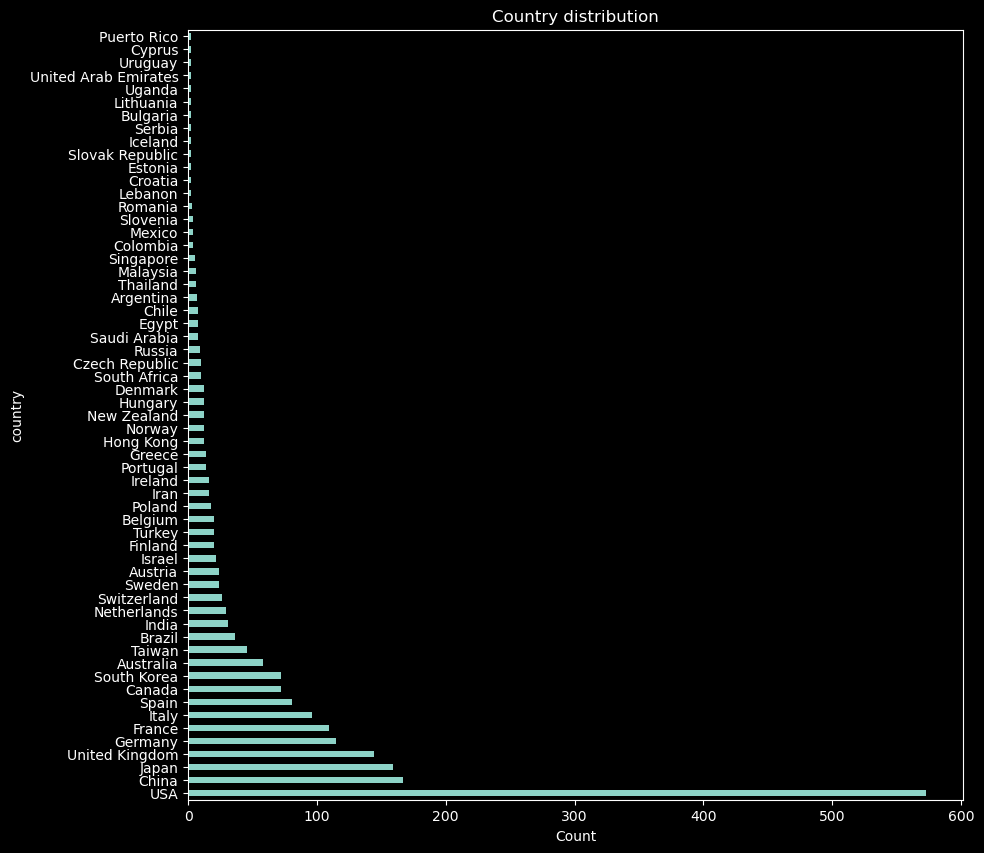

In [17]:
# Figure size
plt.figure(figsize=(10,10))

df['country'].value_counts().plot.barh()

# Aesthetics
plt.title('Country distribution')
plt.xlabel('Count')

In [18]:
df['year'].value_counts(dropna=False)

year
2014    1000
2015    1000
2012     100
2013     100
Name: count, dtype: int64

In [19]:
df['world_rank_2'] = pd.qcut(df['world_rank'],10,duplicates='drop')

In [20]:
df['world_rank_2'].value_counts(dropna=False)

world_rank_2
(0.999, 55.9]      220
(55.9, 120.8]      220
(120.8, 230.7]     220
(230.7, 340.6]     220
(340.6, 450.5]     220
(450.5, 560.4]     220
(560.4, 670.3]     220
(670.3, 780.2]     220
(780.2, 890.1]     220
(890.1, 1000.0]    220
Name: count, dtype: int64

In [21]:
df[df['country'] == 'Russia']

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,world_rank_2
189,90,Lomonosov Moscow State University,Russia,1,14,101,51,101,101,101,NaN,101,44.93,2013,"(55.9, 120.8]"
247,48,Lomonosov Moscow State University,Russia,1,14,210,50,264,247,310,361.0,737,56.42,2014,"(0.999, 55.9]"
484,285,Saint Petersburg State University,Russia,2,37,129,210,619,620,609,756.0,737,46.49,2014,"(230.7, 340.6]"
1115,916,Novosibirsk State University,Russia,3,147,478,210,875,910,609,994.0,737,44.38,2014,"(890.1, 1000.0]"
1258,59,Lomonosov Moscow State University,Russia,1,14,175,48,268,254,287,344.0,861,54.19,2015,"(55.9, 120.8]"
1449,250,Moscow Institute of Physics and Technology,Russia,2,23,339,218,949,605,812,1000.0,839,46.55,2015,"(230.7, 340.6]"
1605,406,Saint Petersburg State University,Russia,3,47,250,218,621,574,645,754.0,816,45.14,2015,"(340.6, 450.5]"
1954,755,National Research Nuclear University MEPhI,Russia,4,306,567,218,957,699,428,671.0,871,44.29,2015,"(670.3, 780.2]"
2184,985,Novosibirsk State University,Russia,5,167,567,218,819,858,645,991.0,871,44.04,2015,"(890.1, 1000.0]"


In [22]:
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['world_rank', 'national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score', 'year']


C:\Anaconda\Lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable institution is large: 1024. Are you sure this is not an interval variable? Analysis for pairs of variables including institution can be slow.
  warnings.warn(


<Axes: >

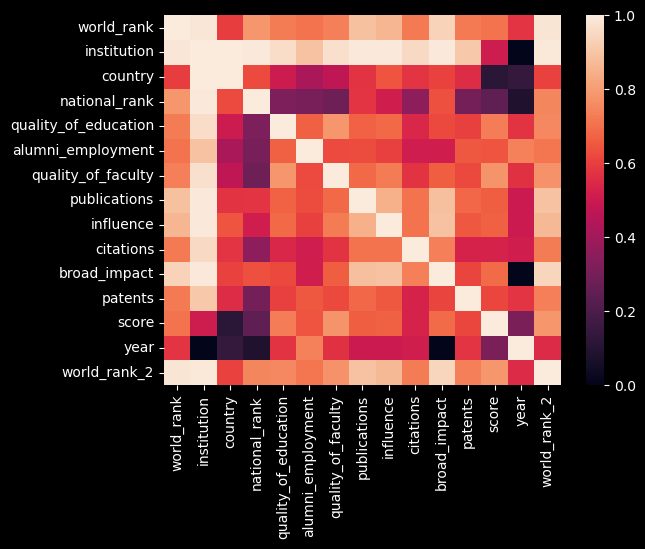

In [23]:
sns.heatmap(phik_overview)

In [24]:
phik_overview['institution'].sort_values(ascending=False)

institution             1.000000
country                 1.000000
national_rank           0.995096
publications            0.994257
influence               0.993200
broad_impact            0.992649
world_rank_2            0.988720
world_rank              0.988024
quality_of_faculty      0.972301
quality_of_education    0.963358
citations               0.952251
patents                 0.909158
alumni_employment       0.892249
score                   0.506864
year                    0.000000
Name: institution, dtype: float64

In [25]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year', 'world_rank_2'],
      dtype='object')

In [26]:
t = df.groupby('institution')['world_rank'].agg(['count','mean'])

<Axes: ylabel='institution'>

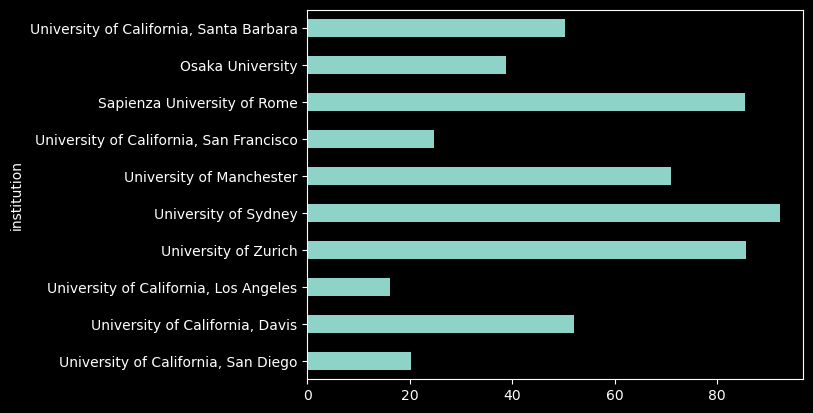

In [27]:
t.sort_values('count',ascending=False).head(10)['mean'].plot(kind='barh')

In [28]:
(df[df['world_rank'] < 10]
 .groupby('institution')
 ['world_rank'].agg(['count','mean','median']))

,count,mean,median
institution,,,
California Institute of Technology,1,5.000000,5.0
Columbia University,4,6.750000,6.0
Harvard University,4,1.000000,1.0
Massachusetts Institute of Technology,4,3.000000,3.0
Princeton University,4,8.000000,8.5
Stanford University,4,2.250000,2.0
"University of California, Berkeley",3,7.000000,7.0
University of Cambridge,4,4.250000,4.0
University of Chicago,3,8.333333,8.0
